In [391]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file, skipping the first two header rows
file_path_demo = 'data/INSEE_demo_2024.xlsx'
file_path_solde = 'data/INSEE_solde_2022.xlsx'
file_path_solde_updated = 'data/INSEE_solde_2022_updated.xlsx'
file_path_solde_updated2 = 'data/INSEE_solde_2022_updated2.xlsx'
file_path_frac = 'data/INSEE_immig_2023.xlsx'
file_path_demo_immig = 'data/INSEE_demo_immig_2017.xlsx'
file_path_ined = 'data/bdd-donnees-annexes-fr-12-2024.xlsx'
file_path_solde_nat = 'data/INSEE_solde_naturel_2024.xlsx'
file_path_pop = 'data/INSEE_pop_2024.xlsx'

df_demo = pd.read_excel(file_path_demo, sheet_name='Données', skiprows=2)

df_solde_raw = pd.read_excel(
    file_path_solde_updated2,
    sheet_name='Figure 4',
    header=None,
    skiprows=2,
    na_values=['nd']
)

#df_solde_ni_raw = pd.read_excel(
#    file_path_solde_updated,
#    sheet_name='Figure 2b',
#    header=None,
#    skiprows=3,
#    na_values=['nd']
#)

df_frac = pd.read_excel(
    file_path_frac,
    sheet_name='Données',
    skiprows=2,
    usecols=[0,1,2],
    names=['Année','Étrangers (%)','Immigrés (%)'],
    na_values=[
      'p : données provisoires.',
      'Lecture :',
      'Champ :',
      'Source :'
    ]
)

df_demo_immig_raw = pd.read_excel(
    file_path_demo_immig,
    sheet_name='Figure 1a',
    header=None,
    skiprows=3,
    na_values=['nd']
)

df_solde_nat_raw = pd.read_excel(
    file_path_solde_nat,
    sheet_name='Données',
    skiprows=2,
    usecols=[0,1,2],
    names=['Année', 'Naissances', 'Décès'],
    na_values=[
      'p : données provisoires.',
      'Lecture :',
      'Champ :',
      'Source :'
    ]
)

df_pop_raw = pd.read_excel(
    file_path_pop,
    sheet_name='Données',
    skiprows=2,
    usecols=[0,1,2],
    names=['Année', 'Femmes', 'Hommes'],
    na_values=[
      'p : données provisoires.',
      'Lecture :',
      'Champ :',
      'Source :'
    ]
)

df_pop_immig_raw = pd.read_excel(
    file_path_solde,
    sheet_name='Figure 5',
    header=None,
    #skiprows=4,
    na_values=['nd']
)

print(df_solde_i_raw)
#print(df_solde_ni_raw)

# test new file
#xls = pd.ExcelFile(file_path_solde_updated2)
# List available sheets
#print(xls.sheet_names)

#df_annexe1 = xls.parse("Annexe 1")
#print(df_annexe1)
#for name in xls.sheet_names:
#    print(name)
#print(df_annexe1.head())

#print(df_pop_immig_raw)

                                                    0            1  \
0                                               Année     Immigrés   
1                                                 NaN  Entrées (1)   
2                                                2023          347   
3                                                2022          375   
4                                                2021          283   
5                                                2020          246   
6                                                2019          307   
7                                                2018          305   
8                                                2017          291   
9                                                2016          287   
10                                               2015          278   
11                                               2014          259   
12                                               2013          277   
13                  

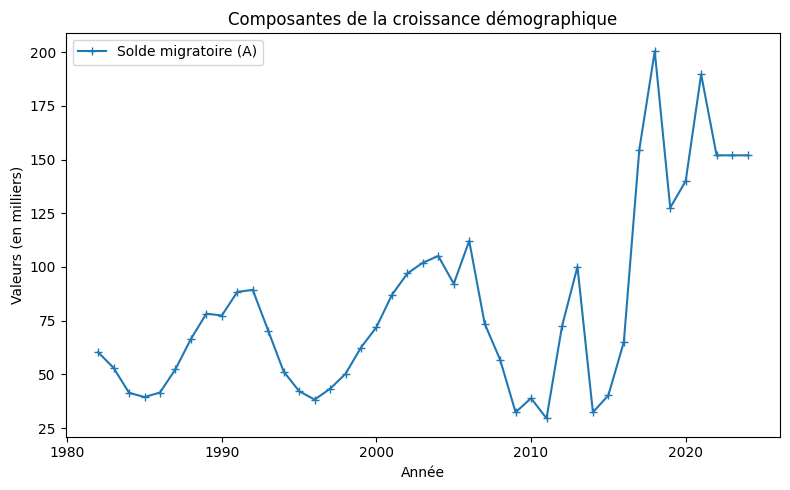

In [340]:
# Rename columns for clarity
df = df_demo.copy()
df = df.rename(columns={
    df.columns[0]: 'Année',
    df.columns[1]: 'Solde naturel (A)',
    df.columns[2]: 'Solde migratoire (A)'
})

# Keep relevant columns
df = df[['Année', 'Solde naturel (A)', 'Solde migratoire (A)']]

# Extract year and drop rows where extraction fails
df['Year_extracted'] = df['Année'].astype(str).str.extract(r'(\d{4})')[0]
df['Year_extracted'] = pd.to_numeric(df['Year_extracted'], errors='coerce')
df = df.dropna(subset=['Year_extracted'])

# Convert to integer year
df['Année'] = df['Year_extracted'].astype(int)

df = df.drop('Year_extracted', axis=1)

# Supprimer les lignes où tout est NaN sauf 'Année'
df = df.dropna(subset=['Solde naturel (A)', 'Solde migratoire (A)'], how='all')

df_demo_shaped = df.copy()

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(8, 5))
#ax.plot(df['Année'], df['Solde naturel (A)'], label='Solde (A)', marker='+')
ax.plot(df['Année'], df['Solde migratoire (A)'], label='Solde migratoire (A)', marker='+')
#bottom=df['Solde naturel (A)']
#ax.bar(df['Année'], df['Solde migratoire'])

ax.set_xlabel('Année')
ax.set_ylabel('Valeurs (en milliers)')
ax.set_title('Composantes de la croissance démographique')
ax.legend()

plt.tight_layout()
plt.show()

     Année Entrées Immigrés (B) Sorties Immigrés (B)  \
0      NaN                  NaN                  NaN   
1      NaN             Immigrés                  NaN   
2      NaN          Entrées (1)          Sorties (2)   
3   2023.0                  347                  NaN   
4   2022.0                  375                  NaN   
5   2021.0                  283                 -123   
6   2020.0                  246                  -94   
7   2019.0                  307                 -125   
8   2018.0                  305                  -83   
9   2017.0                  291                  -93   
10  2016.0                  287                  -66   
11  2015.0                  278                  -94   
12  2014.0                  259                  -65   
13  2013.0                  277                  -92   
14  2012.0                  278                 -104   
15  2011.0                  255                  -96   
16  2010.0                  251                 

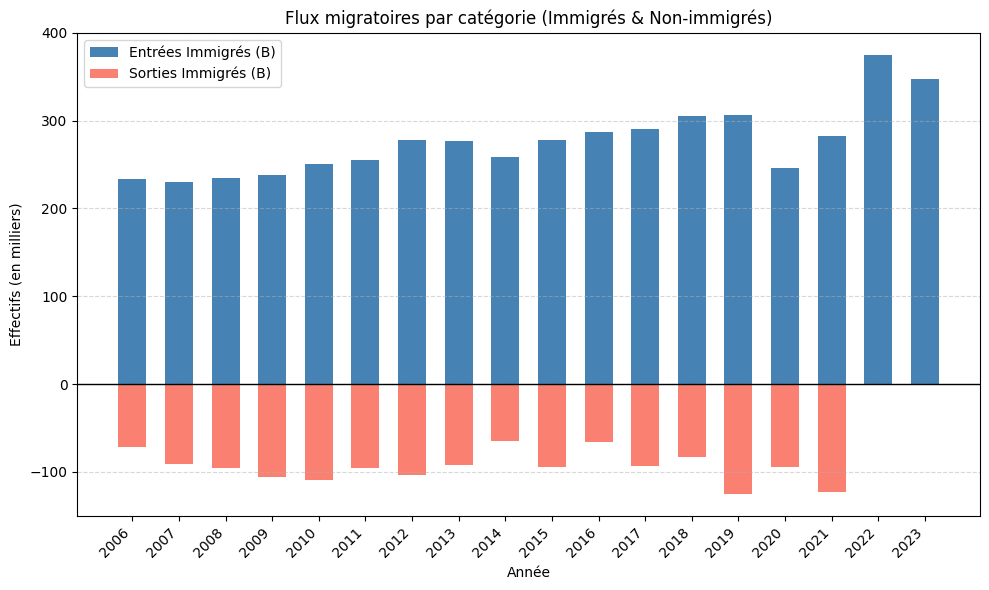

In [395]:
# 2) Select relevant columns: Year, Immigrant entries, Immigrant exits, Non-imm entries, Non-imm exits
df = df_solde_raw.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].copy()
df = df.iloc[:-5]
df.columns = ['Année', 'Entrées Immigrés (B)', 'Sorties Immigrés (B)', 'Solde migratoire Immigrés (B)', 'Entrées Non-immigrés (B)', 'Sorties Non-immigrés (B)', 'Solde migratoire Non-immigrés (B)', 'Entrées (B)', 'Sorties (B)', 'Solde migratoire (B)']

# 3) Clean data
#    • Extract and convert year
df['Année'] = df['Année'].astype(str).str.extract(r'(\d{4})')

df['Année'] = pd.to_numeric(df['Année'], errors='coerce')
print(df)
df = df.dropna(subset=['Année'])
df['Année'] = df['Année'].astype(int)

#    • Convert flows to numeric and absolute values
for col in ['Entrées Immigrés (B)', 'Sorties Immigrés (B)', 'Solde migratoire Immigrés (B)', 'Entrées Non-immigrés (B)', 'Sorties Non-immigrés (B)', 'Solde migratoire Non-immigrés (B)', 'Entrées (B)', 'Sorties (B)', 'Solde migratoire (B)']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).abs()

#df = df_i.merge(df_ni, on="Année", how="outer")

df = df.dropna(subset=['Année', 'Entrées Immigrés (B)', 'Sorties Immigrés (B)', 'Solde migratoire Immigrés (B)', 'Entrées Non-immigrés (B)', 'Sorties Non-immigrés (B)', 'Solde migratoire Non-immigrés (B)', 'Entrées (B)', 'Sorties (B)', 'Solde migratoire (B)'], how='all')
print(df)
df_solde_shaped = df.copy()

# 4) Plot stacked bar chart for entries, and stacked negative bars for exits
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.6

# Entries (stacked)
ax.bar(df['Année'], df['Entrées Immigrés (B)'], width, label='Entrées Immigrés (B)', color='steelblue')
#ax.bar(df['Année'], df['Entrées Non-immigrés (B)'], width, label='Entrées Non-immigrés (B)', color='lightblue')
#, bottom=df['Entrées Immigrés']

# Exits (stacked as negative)
ax.bar(df['Année'], -df['Sorties Immigrés (B)'], width, label='Sorties Immigrés (B)', color='salmon')
#ax.bar(df['Année'], -df['Sorties Non-immigrés (B)'], width, label='Sorties Non-immigrés (B)', color='red')
#, bottom=-df['Sorties Immigrés']

# Formatting
ax.set_xlabel('Année')
ax.set_ylabel('Effectifs (en milliers)')
ax.set_title('Flux migratoires par catégorie (Immigrés & Non-immigrés)')
ax.axhline(0, color='black', linewidth=1)
ax.set_xticks(df['Année'])
ax.set_xticklabels(df['Année'].astype(str), rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

    Année  Étrangers (A)  Immigrés (A)  Population (A)
4    2023         5613.9        7281.8         68143.4
36   2023            0.0           0.0             0.0


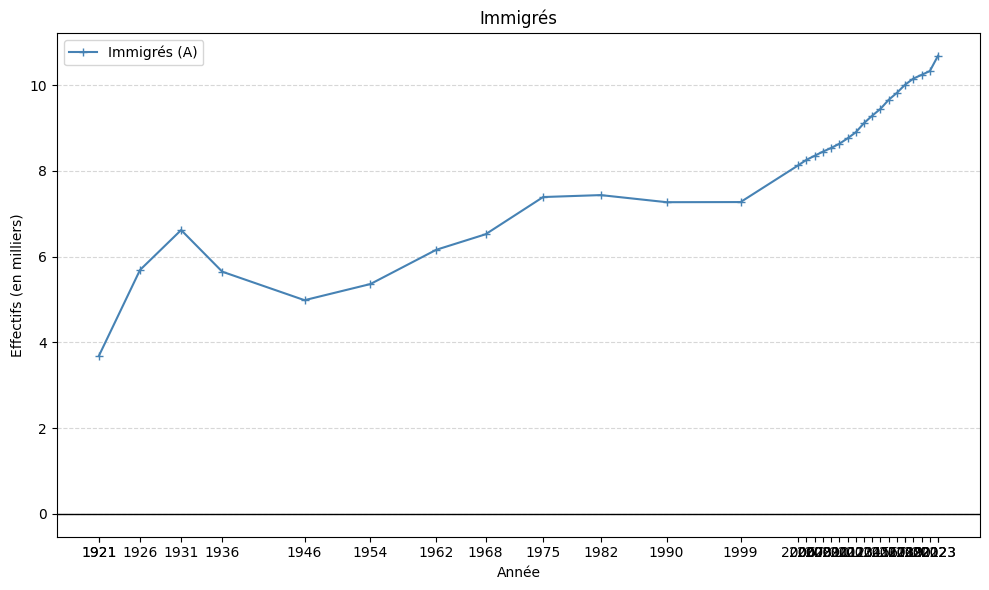

In [405]:
df = df_pop_immig_raw.iloc[:, [0, 1, 3, 5]].copy()
df.columns = ['Année', 'Étrangers (A)', 'Immigrés (A)', 'Population (A)']
# print(df) 
# 3) Clean data
#    • Extract and convert year
df['Année'] = df['Année'].astype(str).str.extract(r'(\d{4})')
# Supprimer les lignes où l'année n'a pas pu être extraite
df = df.dropna(subset=['Année'])
# Convertir proprement en entier
df['Année'] = df['Année'].astype(int)
#print(df)

#    • Convert flows to numeric and absolute values
for col in ['Étrangers (A)', 'Immigrés (A)', 'Population (A)']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).abs()

df = df.dropna(subset=['Année', 'Étrangers (A)', 'Immigrés (A)', 'Population (A)'], how='all')

df_pop_immig_shaped = df.copy()

# 4) Plot stacked bar chart for entries, and stacked negative bars for exits
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.6

#df = df[df['Année']>2005]

print(df[df['Année']==2023])

# Entries (stacked)
#ax.bar(df['Année'], df['Population (A)'], width, label='Population (A)', color='lightblue')
ax.plot(df['Année'], df['Immigrés (A)'] / df['Population (A)'] * 100, label='Immigrés (A)', marker='+', color='steelblue')

# Formatting
ax.set_xlabel('Année')
ax.set_ylabel('Effectifs (en milliers)')
ax.set_title('Immigrés')
ax.axhline(0, color='black', linewidth=1)
ax.set_xticks(df['Année'])
#ax.set_xticklabels(df['Année'].astype(str), rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

    Année Étrangers (%) Immigrés (%)  Étrangers (%) (A)  Immigrés (%) (A)
30   1921           3.9          3.7                3.9               3.7
29   1926             6          5.7                6.0               5.7
28   1931           6.6          6.6                6.6               6.6
27   1936           5.3          5.6                5.3               5.6
26   1946           4.4            5                4.4               5.0
25   1954           4.1          5.4                4.1               5.4
24   1962           4.6          6.2                4.6               6.2
23   1968           5.3          6.5                5.3               6.5
22   1975           6.5          7.4                6.5               7.4
21   1982           6.8          7.4                6.8               7.4
20   1990           6.3          7.3                6.3               7.3
19   1999           5.5          7.3                5.5               7.3
18   2006           5.8          8.1  

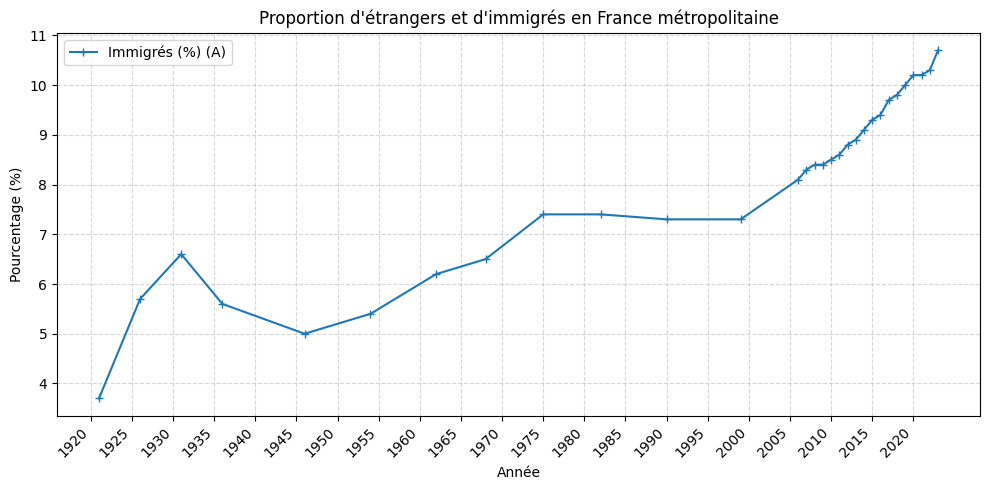

In [397]:
df = df_frac.copy()

# 2) Extract just the 4-digit year into a temp column
df['annee_extracted'] = (
    df['Année']
      .astype(str)
      .str.extract(r'(\d{4})')[0]
)

# 3) Drop rows where that failed (i.e. NaN in annee_extracted)
df = df.dropna(subset=['annee_extracted'])

# 4) Now convert safely to int
df['Année'] = df['annee_extracted'].astype(int)
df = df.drop(columns=['annee_extracted'])

# 5) Clean percentage columns (comma → point, to float)
df['Étrangers (%) (A)'] = (
    df['Étrangers (%)']
      .astype(str)
      .str.replace(',','.')
      .astype(float)
)
df['Immigrés (%) (A)'] = (
    df['Immigrés (%)']
      .astype(str)
      .str.replace(',','.')
      .astype(float)
)

df = df.dropna(subset=['Étrangers (%) (A)', 'Immigrés (%) (A)'] , how='all')
df = df.sort_values('Année')

df_frac_shaped = df.copy()

#df = df.set_index('Année').sort_index()
#df = df.reindex(range(df.index.min(), df.index.max() + 1))
#df['Immigrés (%)'] = df['Immigrés (%)'].interpolate(method='linear')
#df = df.reset_index().rename(columns={'index': 'Année'})


# 2) Plot with tick interval of 5 years
fig, ax = plt.subplots(figsize=(10, 5))

#ax.plot(df['Année'], df['Étrangers (%) (A)'], marker='+', label='Étrangers (%) (A)')
ax.plot(df['Année'], df['Immigrés (%) (A)'], marker='+', label='Immigrés (%) (A)')
#print(df.columns)
print(df.tail(50))
#print(df[['Année', 'Immigrés (%) (A)']])

# Determine tick positions every 5 years
min_year = df['Année'].min()
max_year = df['Année'].max()
start_year = (min_year // 5) * 5
ticks = np.arange(start_year, max_year + 1, 5)

ax.set_xticks(ticks)
ax.set_xticklabels(ticks.astype(int), rotation=45, ha='right')

# Labels and styling
ax.set_title("Proportion d'étrangers et d'immigrés en France métropolitaine")
ax.set_xlabel("Année")
ax.set_ylabel("Pourcentage (%)")
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()

plt.tight_layout()
plt.show()

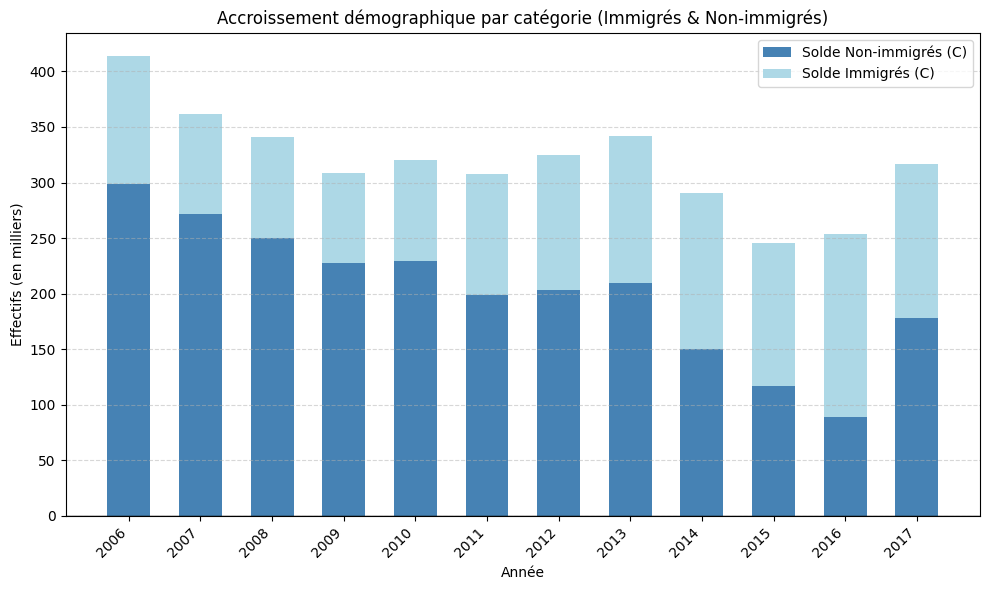

In [398]:
# 2) Select relevant columns: Year, Immigrant entries, Immigrant exits, Non-imm entries, Non-imm exits
df = df_demo_immig_raw.iloc[:, [0, 1, 2, 3]].copy()
df.columns = ['Année', 'Solde Non-immigrés (C)', 'Solde Immigrés (C)', 'Solde (C)']

# 3) Clean data
#    • Extract and convert year
df['Année'] = pd.to_numeric(df['Année'], errors='coerce')
df = df.dropna(subset=['Année'])
df['Année'] = df['Année'].astype(int)

#    • Convert flows to numeric and absolute values
for col in ['Année', 'Solde Non-immigrés (C)', 'Solde Immigrés (C)', 'Solde (C)']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).abs()

df = df.dropna(subset=['Année', 'Solde Non-immigrés (C)', 'Solde Immigrés (C)', 'Solde (C)'], how='all')

df_demo_immig_shaped = df.copy()

# 4) Plot stacked bar chart for entries, and stacked negative bars for exits
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.6

# Entries (stacked)
ax.bar(df['Année'], df['Solde Non-immigrés (C)'], width, label='Solde Non-immigrés (C)', color='steelblue')
ax.bar(df['Année'], df['Solde Immigrés (C)'], width, label='Solde Immigrés (C)', color='lightblue', bottom=df['Solde Non-immigrés (C)'])

# Formatting
ax.set_xlabel('Année')
ax.set_ylabel('Effectifs (en milliers)')
ax.set_title('Accroissement démographique par catégorie (Immigrés & Non-immigrés)')
ax.axhline(0, color='black', linewidth=1)
ax.set_xticks(df['Année'])
ax.set_xticklabels(df['Année'].astype(str), rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

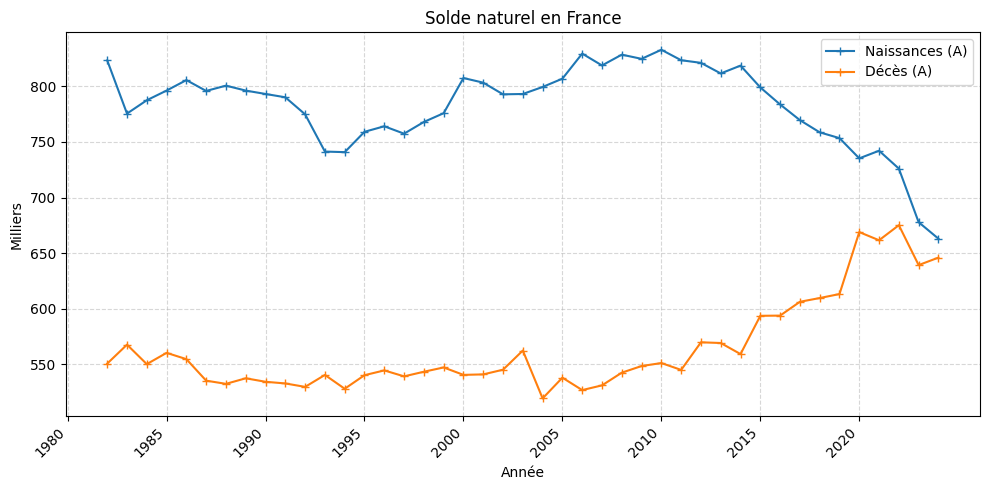

In [399]:
df = df_solde_nat_raw.copy()

# 2) Extract just the 4-digit year into a temp column
df['annee_extracted'] = (
    df['Année']
      .astype(str)
      .str.extract(r'(\d{4})')[0]
)

# 3) Drop rows where that failed (i.e. NaN in annee_extracted)
df = df.dropna(subset=['annee_extracted'])

# 4) Now convert safely to int
df['Année'] = df['annee_extracted'].astype(int)
df = df.drop(columns=['annee_extracted'])

# 5) Clean percentage columns (comma → point, to float)
df['Naissances (A)'] = (
    df['Naissances']
      .astype(str)
      .str.replace(',','.')
      .astype(float)
)
df['Décès (A)'] = (
    df['Décès']
      .astype(str)
      .str.replace(',','.')
      .astype(float)
)

df = df.dropna(subset=['Naissances (A)', 'Décès (A)'] , how='all')

df_solde_nat_shaped = df.copy()

# 2) Plot with tick interval of 5 years
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df['Année'], df['Naissances (A)'], marker='+', label='Naissances (A)')
ax.plot(df['Année'], df['Décès (A)'], marker='+', label='Décès (A)')

# Determine tick positions every 5 years
min_year = df['Année'].min()
max_year = df['Année'].max()
start_year = (min_year // 5) * 5
ticks = np.arange(start_year, max_year + 1, 5)

ax.set_xticks(ticks)
ax.set_xticklabels(ticks.astype(int), rotation=45, ha='right')

# Labels and styling
ax.set_title("Solde naturel en France")
ax.set_xlabel("Année")
ax.set_ylabel("Milliers")
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()

plt.tight_layout()
plt.show()


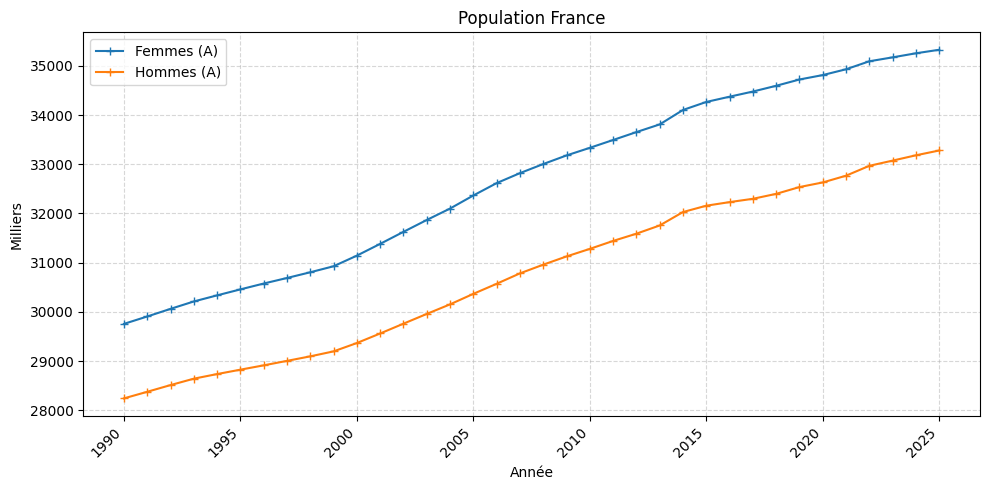

In [400]:
df = df_pop_raw.copy()

# 2) Extract just the 4-digit year into a temp column
df['annee_extracted'] = (
    df['Année']
      .astype(str)
      .str.extract(r'(\d{4})')[0]
)

# 3) Drop rows where that failed (i.e. NaN in annee_extracted)
df = df.dropna(subset=['annee_extracted'])

# 4) Now convert safely to int
df['Année'] = df['annee_extracted'].astype(int)
df = df.drop(columns=['annee_extracted'])

# 5) Clean percentage columns (comma → point, to float)
df['Femmes (A)'] = (
    df['Femmes']
      .astype(str)
      .str.replace(',','.')
      .astype(float)
)
df['Hommes (A)'] = (
    df['Hommes']
      .astype(str)
      .str.replace(',','.')
      .astype(float)
)

df = df.dropna(subset=['Femmes (A)', 'Hommes (A)'] , how='all')

df_pop_shaped = df.copy()

# 2) Plot with tick interval of 5 years
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df['Année'], df['Femmes (A)'], marker='+', label='Femmes (A)')
ax.plot(df['Année'], df['Hommes (A)'], marker='+', label='Hommes (A)')

# Determine tick positions every 5 years
min_year = df['Année'].min()
max_year = df['Année'].max()
start_year = (min_year // 5) * 5
ticks = np.arange(start_year, max_year + 1, 5)

ax.set_xticks(ticks)
ax.set_xticklabels(ticks.astype(int), rotation=45, ha='right')

# Labels and styling
ax.set_title("Population France")
ax.set_xlabel("Année")
ax.set_ylabel("Milliers")
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()

plt.tight_layout()
plt.show()


    Année  Entrées Immigrés (B)  Sorties Immigrés (B)  \
49   2020                 246.0                  94.0   

    Solde migratoire Immigrés (B)  Entrées Non-immigrés (B)  \
49                          152.0                     125.0   

    Sorties Non-immigrés (B)  Solde migratoire Non-immigrés (B)  Entrées (B)  \
49                     136.0                              -11.0        371.0   

    Sorties (B)  Solde migratoire (B) Solde naturel (A) Solde migratoire (A)  \
49        231.0                 141.0            66.274              140.005   

   Étrangers (%) Immigrés (%)  Étrangers (%) (A)  Immigrés (%) (A)  \
49           7.6         10.2                7.6              10.2   

    Solde Non-immigrés (C)  Solde Immigrés (C)  Solde (C) Naissances    Décès  \
49                     NaN                 NaN        NaN    735.196  668.922   

    Naissances (A)  Décès (A)     Femmes     Hommes  Femmes (A)  Hommes (A)  \
49         735.196    668.922  34812.046  32629.804  

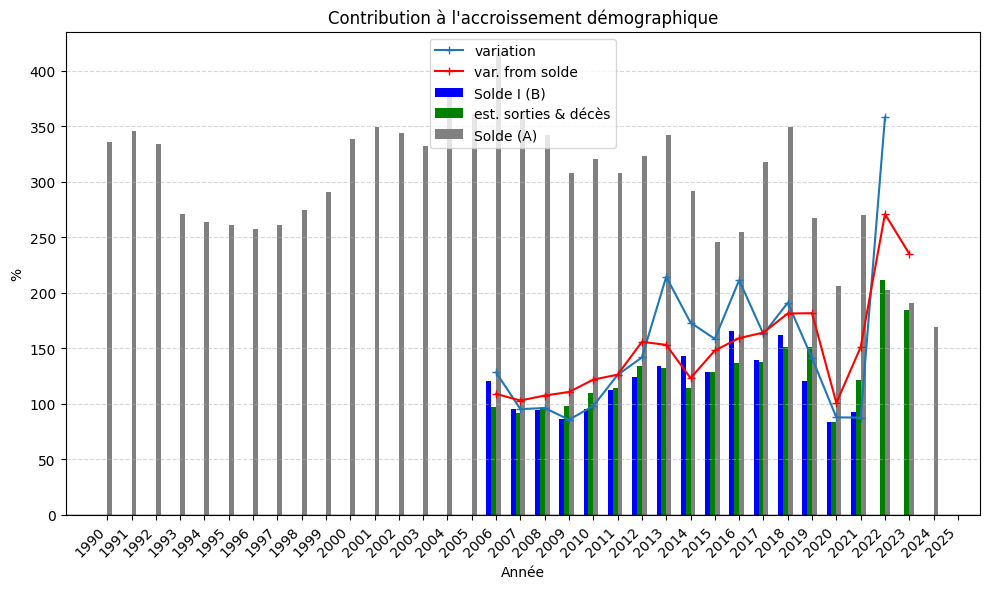

In [411]:
df_merged = df_solde_shaped.merge(df_demo_shaped, on="Année", how="outer").merge(df_frac_shaped, on="Année", how="outer").merge(df_demo_immig_shaped, on="Année", how="outer").merge(df_solde_nat_shaped, on="Année", how="outer").merge(df_pop_shaped, on="Année", how="outer").merge(df_pop_immig_shaped, on="Année", how="outer") 

# (Optionnel) Trier par année si besoin
df_merged = df_merged.sort_values("Année").reset_index(drop=True)
#print(df_merged['Année'])
#df_merged = df_merged.dropna(subset=['Solde naturel', 'Solde migratoire', 'Entrées Non-immigrés', 'Sorties Non-immigrés', 'Entrées Immigrés', 'Sorties Immigrés', 'Solde Non-immigrés', 'Solde Immigrés', 'Solde', 'Naissances', 'Décès'], how='any')
#df_merged = df_merged[df_merged['Sorties Immigrés'] != 0]
#df_merged = df_merged.dropna(subset=['Entrées Immigrés'], how='any')
#df_merged = df_merged.dropna(subset=['Immigrés (A)'], how='any')
df_merged = df_merged.drop_duplicates(subset='Année', keep='first')
df = df_merged.copy()

#print(df_merged[df_merged.duplicated(subset='Année', keep=False)])
#print(df_merged['Année'])
# A: 01/2025
# B: 08/2024 --> 22/05/2025
# C: 04/2021
# D: population 2024
limite_sorties = 2021

df['Solde (C)'] = df['Solde Immigrés (C)'] + df['Solde Non-immigrés (C)']

df['Solde migratoire Immigrés (B)'] = df['Entrées Immigrés (B)'] - df[(df['Année'] >= 2006) & (df['Année'] <= limite_sorties)]['Sorties Immigrés (B)']
df['Solde migratoire Non-immigrés (B)'] = df['Entrées Non-immigrés (B)'] - df[(df['Année'] >= 2006) & (df['Année'] <= limite_sorties)]['Sorties Non-immigrés (B)']
df['Solde migratoire (B)'] = df['Solde migratoire Immigrés (B)'] + df['Solde migratoire Non-immigrés (B)']

df['Décès Immigrés (BC)'] = (df['Solde Immigrés (C)'] - df['Solde migratoire Immigrés (B)']).abs()
df['Décès Non-immigrés (ABC)'] = df['Décès (A)'] - df['Décès Immigrés (BC)']
df['Décès Immigrés (Ae)'] = df['Immigrés (%) (A)'] / 100.0 * df['Décès (A)']
df['Décès Non-immigrés (Ae)'] = (100 - df['Immigrés (%) (A)']) / 100.0 * df['Décès (A)'] # complémentaire

df['Solde Immigrés (ABe)'] = df['Solde migratoire Immigrés (B)'] - df['Décès Immigrés (Ae)']
df['Solde Non-immigrés (ABe)'] = df['Solde migratoire Non-immigrés (B)'] + df['Solde naturel (A)'] + df['Décès Immigrés (Ae)']
df['Solde (ABe)'] = df['Solde Immigrés (ABe)'] + df['Solde Non-immigrés (ABe)'] 
df['Solde (A)'] = df['Solde naturel (A)'] + df['Solde migratoire (A)']

df['Sorties (AB)'] =  (df['Solde migratoire (A)'] - df['Entrées Immigrés (B)'] - df['Entrées Non-immigrés (B)']).abs()
df['Sorties Immigrés (ABe)'] = df[(df['Année'] >= 2006) & (df['Année'] <= limite_sorties)]['Sorties Immigrés (B)'].mean() # first constant estimation 
#df['Sorties Immigrés (ABe)'] = df['Sorties (AB)'] * df['Sorties Immigrés (B)'].mean() / df['Sorties (AB)'].mean() # prop. estimation
df['Sorties Non-immigrés (ABe)'] = df[(df['Année'] >= 2006) & (df['Année'] <= limite_sorties)]['Sorties Non-immigrés (B)'].mean() # first constant estimation 
#df['Sorties Non-immigrés (ABe)'] = df['Sorties (AB)'] * df['Sorties Non-immigrés (B)'].mean() / df['Sorties (AB)'].mean() # prop. estimation

df['Solde migratoire Immigrés (ABe)'] = df['Entrées Immigrés (B)'] - df['Sorties Immigrés (ABe)']
df['Solde migratoire Non-immigrés (ABe)'] = df['Entrées Non-immigrés (B)'] - df['Sorties Non-immigrés (ABe)']
df['Solde migratoire (ABe)'] = df['Solde migratoire Immigrés (ABe)'] + df['Solde migratoire Non-immigrés (ABe)']

df['Solde Immigrés (ABe+)'] = df['Solde migratoire Immigrés (ABe)'] - df['Décès Immigrés (Ae)']
df['Solde Non-immigrés (ABe+)'] = df['Solde migratoire Non-immigrés (ABe)'] + df['Solde naturel (A)'] + df['Décès Immigrés (Ae)']
df['Solde (ABe+)'] = df['Solde Immigrés (ABe+)'] + df['Solde Non-immigrés (ABe+)']

df['Solde Immigrés (Apop)'] = df[(df['Année'] >= 2006)]['Immigrés (A)'].shift(-1) - df[(df['Année'] >= 2006)]['Immigrés (A)']

df['Variation Immigrés (A)'] = (df['Immigrés (A)'].shift(-1) / df['Population (A)'].shift(-1) - df['Immigrés (A)'] / df['Population (A)']) / (df['Année'].shift(-1) - df['Année'])

df['Variation Immigrés (ABe+)'] = (df['Solde Immigrés (ABe+)'] + df['Immigrés (A)']) / (df['Population (A)'] + df['Solde (ABe+)']) - df['Immigrés (A)'] / df['Population (A)']

df.to_csv('data/data_immig_demo_combined_05_06_2025.csv', index=False)

df = df[df['Année'] >= 1990 ]

#print(df.keys)
#print(df['Année'])
#print(df['Immigrés'])
#print(df['Population'])
#print(df['Solde Immigrés 2'])
# 4) Plot stacked bar chart for entries, and stacked negative bars for exits
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2

# Entries (stacked) 
#ax.bar(df['Année'], (df['Décès immigrés']/df['Décès']*100 - df['Immigrés (%)'])/df['Immigrés (%)']*100, width, label='% Décès Immigrés', color='black')
#ax.bar(df['Année']-width/1.5, df['Solde Immigrés'], width, label='Solde Immigrés', color='orange')
#ax.bar(df['Année'], df['Solde Immigrés (e)'], width, label='Solde Immigrés (e)', color='blue')
#ax.bar(df['Année']+width/1.5, df['Solde Immigrés (ee)'], width, label='Solde Immigrés (ee)', color='red')

#ax.bar(df['Année']-width/2, df['Sorties Non-immigrés (B)'], width, label='Sorties Non-immigrés (B)', color='blue')
#ax.bar(df['Année']+width/2, df['Sorties Non-immigrés (ABe)'], width, label='Sorties Non-immigrés (ABe)', color='red')

#ax.bar(df['Année']-width*1.5, df['Solde Non-immigrés (Apop)'], width, label='Solde (pop)', color='orange')
#ax.bar(df['Année']-width/2, df['Solde Non-immigrés (C)'], width, label='Solde (C)', color='blue')
#ax.bar(df['Année']+width/2, df['Solde Non-immigrés (ABe)'], width, label='est. décès', color='red')
#ax.bar(df['Année']+width*1.5, df['Solde Non-immigrés (ABe+)'], width, label='est. sorties & décès', color='green')

#ax.bar(df['Année']-width*1.5, df['Solde Immigrés (Apop)'], width, label='Solde (pop)', color='orange')
ax.bar(df['Année']-width*1.5, df['Solde Immigrés (ABe)'], width, label='Solde I (B)', color='blue')
#ax.bar(df['Année']+width/2, df['Solde Immigrés (ABe)'], width, label='est. décès', color='red')
ax.bar(df['Année']-width/2, df['Solde Immigrés (ABe+)'], width, label='est. sorties & décès', color='green')

#ax.bar(df['Année']-width*1.5, df['Solde (A)'], width, label='Solde (A)', color='gray')
#ax.bar(df['Année']-width*0.5, df['Solde (C)'], width, label='Solde (C)', color='red')
#ax.bar(df['Année']+width*0.5, df['Solde (ABe)'], width, label='Solde (ABe)', color='blue')
ax.bar(df['Année']+width*0.5, df['Solde (A)'], width, label='Solde (A)', color='gray')

#ax.plot(df['Année'], (df['Immigrés (%) (A)'].shift(-1) - df['Immigrés (%) (A)']) / 100 * df['Population (A)']/(df['Année'].shift(-1)-df['Année']), marker='+', label='variation')
ax.plot(df['Année'], (df['Immigrés (A)'].shift(-1) / df['Population (A)'].shift(-1) - df['Immigrés (A)'] / df['Population (A)']) / (df['Année'].shift(-1) - df['Année']) * 100 * 1000, marker='+', label='variation')
ax.plot(df['Année'], ((df['Solde Immigrés (ABe+)'] + df['Immigrés (A)']) / (df['Population (A)'] + df['Solde (ABe+)']) - df['Immigrés (A)'] / df['Population (A)']) * 100 * 1000 , marker='+', color='red', label='var. from solde')

#(y + new_people * (1 - fraction_x)) / (population + new_people) - y / population

#ax.bar(df['Année']-width/2, df['Solde Non-immigrés (C)'], width, label='Solde Non-immigrés (C)', color='gray')
#ax.bar(df['Année']-width/2, df['Solde Immigrés (C)'], width, label='Solde Immigrés (C)', color='gray')
#, bottom = df['Solde Non-immigrés (C)']
#ax.bar(df['Année']-width*1.5, df['Solde Non-immigrés (ABe)'], width, label='Solde Non-immigrés (ABe)', color='orange')
#ax.bar(df['Année']-width*1.5, df['Solde Immigrés (ABe)'], width, bottom = df['Solde Non-immigrés (ABe)'], label='Solde Immigrés (ABe)', color='red')
#ax.bar(df['Année']+width/2, df['Solde Non-immigrés (ABe+)'], width, label='Solde Non-immigrés (ABe+)', color='blue')
#ax.bar(df['Année']+width/2, df['Solde Immigrés (ABe+)']/ df['Solde (ABe+)'] * 100, width, label='% Solde (ABe+)', color='green')
#, bottom = df['Solde Non-immigrés (ABe+)']

#ax.bar(df['Année']+width/2, df['Solde Immigrés (ABe+)']/df['Solde (ABe+)']*100, width, label='Solde Immigrés (ABe+) %', color='green')

#bottom=df['Solde Immigrés']
# Formatting
ax.set_xlabel('Année')
ax.set_ylabel('%')
ax.set_title("Contribution à l\'accroissement démographique")
ax.axhline(0, color='black', linewidth=1)
ax.set_xticks(df['Année'])
ax.set_xticklabels(df['Année'].astype(str), rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
#plt.show()
pd.set_option('display.max_columns', None)
print(df[df['Année'] == 2020])
#plt.savefig("plots/solde_immig_est_comp.png", dpi=500, bbox_inches='tight')